# Assignment 2 - Kanak Agarwal

### Reverse a Singly Linked List

In [3]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None


class LinkedList:
    def __init__(self):
        self.head = None

    def push(self, new_data):
        new_node = Node(new_data)
        new_node.next = self.head
        self.head = new_node

    def print_list(self):
        temp = self.head
        while temp:
            print(temp.data, end=" -> ")
            temp = temp.next
        print("None")

    def reverse(self):
        prev = None
        current = self.head

        while current:
            while current:
                current.next, prev, current = prev, current, current.next

        self.head = prev

if __name__ == "__main__":
    llist = LinkedList()
    for val in [5, 4, 3, 2, 1]:
        llist.push(val)

    print("Original list:")
    llist.print_list()

    llist.reverse()
    print()

    print("Reversed list:")
    llist.print_list()


Original list:
1 -> 2 -> 3 -> 4 -> 5 -> None

Reversed list:
5 -> 4 -> 3 -> 2 -> 1 -> None


### Tower of Hanoi

N=3, Time=0.000003 sec
N=5, Time=0.000004 sec
N=10, Time=0.000140 sec
N=20, Time=0.109444 sec


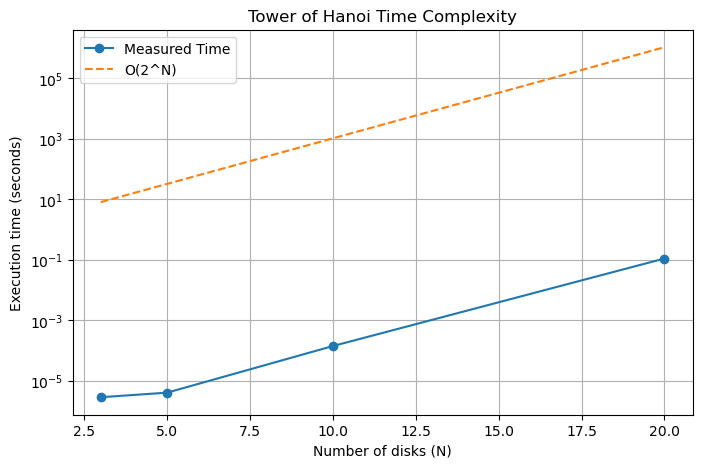

In [3]:
import time
import matplotlib.pyplot as plt

def TowerOfHanoi(n, from_rod, to_rod, aux_rod):
    if n == 0:
        return
    TowerOfHanoi(n-1, from_rod, aux_rod, to_rod)
    TowerOfHanoi(n-1, aux_rod, to_rod, from_rod)


N = [3, 5, 10, 20]

times = []

for n in N:
    start_time = time.time()
    TowerOfHanoi(n, 'A', 'C', 'B')
    end_time = time.time()
    times.append(end_time - start_time)
    print(f"N={n}, Time={end_time - start_time:.6f} sec")


# Plotting
plt.figure(figsize=(8,5))
plt.plot(N, times, marker='o',label='Measured Time')
plt.plot(N, [2**n for n in N], linestyle='--', label='O(2^N)')
plt.xlabel("Number of disks (N)")
plt.ylabel("Execution time (seconds)")
plt.title("Tower of Hanoi Time Complexity")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.show()

In [1]:
def TowerOfHanoi(n, from_rod, to_rod, aux_rod):
    if n == 0:
        return
    TowerOfHanoi(n-1, from_rod, aux_rod, to_rod)
    print("Move disk", n, "from rod", from_rod, "to rod", to_rod)
    TowerOfHanoi(n-1, aux_rod, to_rod, from_rod)

TowerOfHanoi(3, 'A', 'C', 'B')

Move disk 1 from rod A to rod C
Move disk 2 from rod A to rod B
Move disk 1 from rod C to rod B
Move disk 3 from rod A to rod C
Move disk 1 from rod B to rod A
Move disk 2 from rod B to rod C
Move disk 1 from rod A to rod C


### Entropy of a Binary Tree

In [1]:
import math
import random

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
    
def insert(root, value):
    if root is None:
        return Node(value)
    if value < root.data:
        root.left = insert(root.left, value)
    else:
        root.right = insert(root.right, value)
    return root

def subtree_weight(root):
    if root is None:
        return 0
    return root.data + subtree_weight(root.left) + subtree_weight(root.right)

def local_entropy(node):
    if node is None:
        return 0
    if node.left is None and node.right is None: # Leaf Node
        return 0
    
    Wv = subtree_weight(node)
    entropy = 0
    for child in [node.left, node.right]:
        if child:
            Wc = subtree_weight(child)
            p = Wc / Wv
            entropy -= p * (0 if p == 0 else math.log2(p))
    return entropy

def total_entropy(node):
    if node is None:
        return 0
    return local_entropy(node) + total_entropy(node.left) + total_entropy(node.right)

def print_tree(node, prefix="", is_left=True):
    if node is not None:
        print_tree(node.right, prefix + ("│   " if is_left else "    "), False)

        # Print current node
        print(prefix + ("└── " if is_left else "┌── ") + str(node.data))

        # Print left subtree
        print_tree(node.left, prefix + ("    " if is_left else "│   "), True)

def print_entropies(node):
    if node is not None:
        print_entropies(node.left)
        print(f"Node {node.data}: Local Entropy = {local_entropy(node):.4f}")
        print_entropies(node.right)

random.seed(0) # Fixes random values generated
numbers = random.sample(range(10, 100), 15)

root = None
for n in numbers:
    root = insert(root, n)

print("Numbers:", numbers)
print()

print("Binary Search Tree:")
print()
print_tree(root)
print()

print("Local Entropies:")
print_entropies(root)

print(f"\nTotal Entropy of the tree: {total_entropy(root):.4f}")

Numbers: [59, 63, 15, 43, 75, 72, 61, 48, 71, 55, 84, 37, 74, 27, 46]

Binary Search Tree:

│           ┌── 84
│       ┌── 75
│       │   │   ┌── 74
│       │   └── 72
│       │       └── 71
│   ┌── 63
│   │   └── 61
└── 59
    │           ┌── 55
    │       ┌── 48
    │       │   └── 46
    │   ┌── 43
    │   │   └── 37
    │   │       └── 27
    └── 15

Local Entropies:
Node 15: Local Entropy = 0.0776
Node 27: Local Entropy = 0.0000
Node 37: Local Entropy = 0.5253
Node 43: Local Entropy = 0.9545
Node 46: Local Entropy = 0.0000
Node 48: Local Entropy = 1.0542
Node 55: Local Entropy = 0.0000
Node 59: Local Entropy = 0.9677
Node 61: Local Entropy = 0.0000
Node 63: Local Entropy = 0.6795
Node 71: Local Entropy = 0.0000
Node 72: Local Entropy = 1.0567
Node 74: Local Entropy = 0.0000
Node 75: Local Entropy = 0.9407
Node 84: Local Entropy = 0.0000

Total Entropy of the tree: 6.2562


In [13]:
def build_tot(numbers): 
    # Build tree for a given insertion order and 
    # calculate its total entropy
    root = None
    for n in numbers:
        root = insert(root, n)
    return root, total_entropy(root)

def find_min_max_entropy(numbers, trials=1000):
    min_entropy, max_entropy = float("inf"), float("-inf")
    min_order, max_order = None, None
    
    for _ in range(trials):
        shuffled = numbers[:]
        random.shuffle(shuffled)
        _ , entropy = build_tot(shuffled)
        
        if entropy < min_entropy:
            min_entropy = entropy
            min_order = shuffled[:]
            min_tree = root
        if entropy > max_entropy:
            max_entropy = entropy
            max_order = shuffled[:]
            max_tree = root
    
    return (min_entropy, min_order), (max_entropy, max_order)

(min_entropy, min_order), (max_entropy, max_order) = find_min_max_entropy(numbers)

print(f"\nMinimum Entropy: {min_entropy:.4f}, Order: {min_order}")
print(f"Maximum Entropy: {max_entropy:.4f}, Order: {max_order}")

max_root, _ = build_tot(max_order)
min_root, _ = build_tot(min_order)

print("\nMaximum Entropy Tree:")
print_tree(max_root)
print(f"Total Entropy = {total_entropy(max_root):.4f}")

print("\nMinimum Entropy Tree:")
print_tree(min_root)
print(f"Total Entropy = {total_entropy(min_root):.4f}")


Minimum Entropy: 3.9867, Order: [27, 43, 48, 15, 37, 55, 61, 71, 75, 84, 59, 63, 46, 74, 72]
Maximum Entropy: 7.0250, Order: [59, 48, 72, 37, 43, 63, 75, 27, 74, 84, 61, 55, 15, 71, 46]

Maximum Entropy Tree:
│           ┌── 84
│       ┌── 75
│       │   └── 74
│   ┌── 72
│   │   │   ┌── 71
│   │   └── 63
│   │       └── 61
└── 59
    │   ┌── 55
    └── 48
        │       ┌── 46
        │   ┌── 43
        └── 37
            └── 27
                └── 15
Total Entropy = 7.0250

Minimum Entropy Tree:
│                           ┌── 84
│                       ┌── 75
│                       │   └── 74
│                       │       └── 72
│                   ┌── 71
│                   │   └── 63
│               ┌── 61
│               │   └── 59
│           ┌── 55
│       ┌── 48
│       │   └── 46
│   ┌── 43
│   │   └── 37
└── 27
    └── 15
Total Entropy = 3.9867
